In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('mlops-project/data/dataset.csv')

In [31]:
df['explicit'] = df['explicit'].apply(lambda x: int(x))

In [32]:
df_filter = df.drop(['Unnamed: 0', 'track_id', 'album_name', 'track_name', 'artists'], axis=1)

In [35]:
df_filter['y'] = df_filter['popularity']
X = df_filter.drop('popularity', axis=1)

In [36]:
X_train_val, X_test = train_test_split(X, test_size=0.2)

In [37]:
X_train, X_val = train_test_split(X_train_val, test_size=0.2)

In [1]:
import mlflow

mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('lab2-experiments')

mlflow.log_artifact('data/processed_train_data.csv')
mlflow.log_artifact('data/processed_val_data.csv')
mlflow.log_artifact('data/processed_test_data.csv')

/Users/tyler_kahn/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024/09/01 20:38:03 INFO mlflow.tracking.fluent: Experiment with name 'lab2-experiments' does not exist. Creating a new experiment.


In [5]:
df = pd.read_csv('data/processed_train_data.csv')
df

,Unnamed: 0,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,y
0,47554,254346,0,0.584,0.8330,11,-5.824,1,0.0358,0.000265,0.005950,0.3200,0.6710,124.018,4,hard-rock,63
1,61974,225042,0,0.570,0.8750,1,-5.065,0,0.0700,0.033400,0.002890,0.3390,0.8020,175.017,4,j-idol,18
2,13309,281933,0,0.747,0.6760,7,-6.941,1,0.0550,0.000368,0.933000,0.1080,0.0373,132.070,4,chicago-house,11
3,13549,295773,0,0.795,0.5260,6,-15.257,0,0.1750,0.131000,0.009090,0.0412,0.8220,103.983,4,chicago-house,7
4,100876,258666,0,0.506,0.7610,4,-9.868,1,0.0571,0.481000,0.000000,0.4560,0.9230,129.286,4,ska,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72955,55391,288365,0,0.636,0.4100,7,-10.372,1,0.0277,0.941000,0.000717,0.1250,0.5160,115.003,1,indian,52
72956,78227,163026,0,0.600,0.9310,3,-4.607,1,0.1060,0.111000,0.000000,0.0863,0.8470,168.040,4,party,0
72957,45681,195466,0,0.686,0.0317,4,-23.894,1,0.0703,0.917000,0.169000,0.1100,0.3980,128.700,4,guitar,23
72958,44077,269373,0,0.433,0.9590,9,-4.040,1,0.0431,0.000917,0.000000,0.0280,0.3650,172.984,4,grunge,79


In [26]:
X = df.drop(['y','track_genre','Unnamed: 0','duration_ms','explicit','key','time_signature'], axis=1)
y = df['y']

In [27]:
X.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

ntrees = [20,40,60,80,100]
mtrys = [3,4,5]
for i in ntrees:
    for j in mtrys:
        with mlflow.start_run():
            mlflow.set_tags({"Model":"random-forest", "Train Data": "all-data"})

            mlflow.log_params({'n_estimators':i, 'max_features':j})

            rf = RandomForestRegressor(n_estimators = i, max_features = j, oob_score = True)
            rf.fit(X,y)
            r2 = rf.oob_score_
            mlflow.log_metric('r2', r2)
            mlflow.sklearn.log_model(rf, artifact_path = 'better_models')
        mlflow.end_run()

/Users/tyler_kahn/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/tyler_kahn/.local/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
2024/09/02 08:30:45 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
/Users/tyler_kahn/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
2024/09/02 08:30:52 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
/Users/tyler_kahn/

In [32]:
ntrees = [20,40,60,80,100]
mtrys = [3,4,5]
for i in ntrees:
    for j in mtrys:
        with mlflow.start_run():
            mlflow.set_tags({"Model":"gradient-boosting", "Train Data": "all-data"})

            mlflow.log_params({'n_estimators':i, 'max_features':j})

            gb = GradientBoostingRegressor(n_estimators = i, max_features = j)
            gb.fit(X,y)
            r2 = gb.score(X,y)
            mlflow.log_metric('r2', r2)
            mlflow.sklearn.log_model(gb, artifact_path = 'better_models')
        mlflow.end_run()

2024/09/02 08:35:10 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:35:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:35:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:35:19 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:35:22 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:35:26 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

In [33]:
h_size = [32,64,128,256]
for i in h_size:
    with mlflow.start_run():
        mlflow.set_tags({"Model":"mlp-regressor", "Train Data": "all-data"})

        mlflow.log_params({'hidden_size':i})

        mlp = MLPRegressor(hidden_layer_sizes = i, learning_rate_init = 0.001, max_iter = 1000)
        mlp.fit(X,y)
        r2 = mlp.score(X,y)
        mlflow.log_metric('r2', r2)
        mlflow.sklearn.log_model(mlp, artifact_path = 'better_models')
    mlflow.end_run()

2024/09/02 08:36:32 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:37:12 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:37:52 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/09/02 08:40:02 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [34]:
runid = '406ca185a9db4330989e62f3ef3f17a2'
mod_path = f'runs:/{runid}/artifacts/better_models'
mlflow.register_model(model_uri = mod_path, name = 'best_model')

Successfully registered model 'best_model'.
Created version '1' of model 'best_model'.


<ModelVersion: aliases=[], creation_timestamp=1725291627583, current_stage='None', description=None, last_updated_timestamp=1725291627583, name='best_model', run_id='406ca185a9db4330989e62f3ef3f17a2', run_link=None, source='/Users/tyler_kahn/Desktop/msds/mlops-project/mlruns/1/406ca185a9db4330989e62f3ef3f17a2/artifacts/artifacts/better_models', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [40]:
model = mlflow.sklearn.load_model(f'runs:/{runid}/better_models')
df = pd.read_csv('data/processed_test_data.csv')
X = df.drop(['y','track_genre','Unnamed: 0','duration_ms','explicit','key','time_signature'], axis=1)
y = df['y']
r2 = model.score(X,y)
mlflow.log_metric('test r2', r2)
mlflow.log_artifact('data/processed_train_data.csv')
mlflow.log_artifact('data/processed_val_data.csv')
mlflow.log_artifact('data/processed_test_data.csv')
mlflow.end_run()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

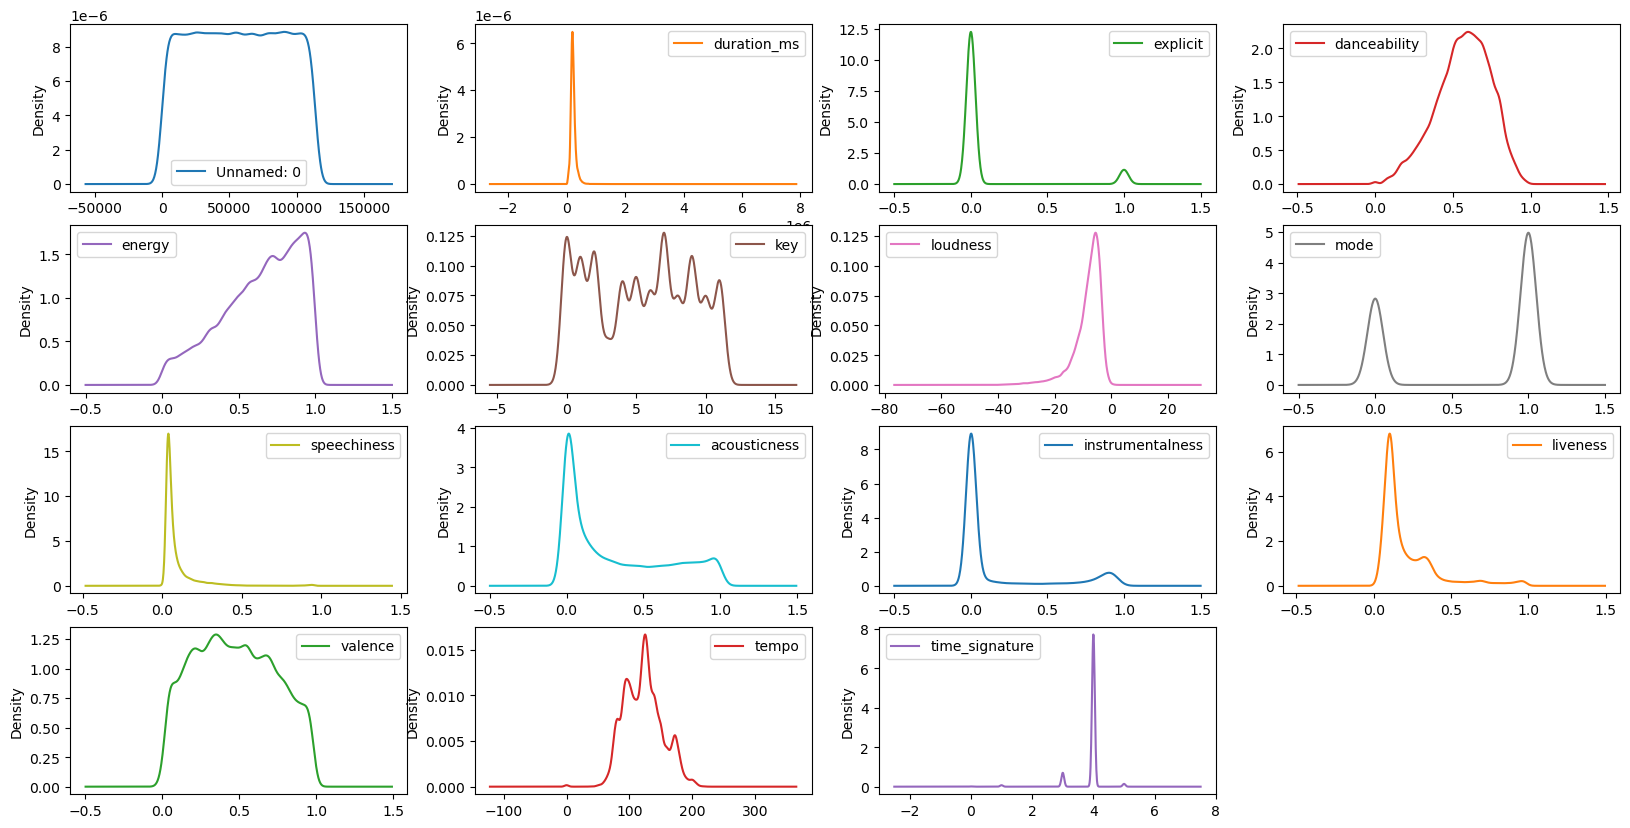

In [17]:
import os
%matplotlib inline
os.makedirs('images', exist_ok = True)
X.plot.density(subplots = True, figsize = (20,10), layout = (4,4), sharey = False, sharex = False)